# Bayesian Learning


- Bayesian statistics allows us to quantify uncertainty about future events and refine our estimates in a principled way as new information arrives.
- It is particularly useful when there are fewer relevant data and we require methods that systematically integrate prior knowledge or assumptions.
- Bayesian statistics, in contrast, views probability as a measure of the confidence or belief in the occurrence of an event.

- References: https://github.com/PacktPublishing/Machine-Learning-for-Algorithmic-Trading-Second-Edition/tree/master/10_bayesian_machine_learning

## 1. How Bayesian ML works 
- Frequentist statistics assumes that data is a random sample from a population and aims to identify the fixed parameters that generated the data.
- Bayesian statistics takes the data as given and considers the parameters to be random variables with a distribution that can be inferred from data.
- Frequentist approaches require at least as many data points as there are parameters to be estimated. Bayesian approaches, on the other hand, are compatible with smaller datasets, and well suited for online learning from one sample at a time.


1. **Conjugate priors** facilitate the updating process by providing a closed-form solution that allows us to precisely compute the solution. However, such exact, analytical methods are not always available.

2. **Approximate inference** simulates the distribution that results from combining assumptions and data and uses samples from this distribution to compute statistical insights

### 1) Bayesian updating with conjugate priors

- Tha data consists of binary Bernoulli random variables with a certain success probability for a positive outcome, the number of suceesses in repeated trials follows a Binomical distribution
- The conjugate prior is the Beta distribution with support over the interval $[0,1]$
- The posterior distribution is also a Beta distribution

In [2]:
## Setup

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.ticker import FuncFormatter

In [4]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

### Formatting Helper

In [5]:
def format_plot(axes, i, p, y, trials, success, true_p, tmle, tmap=None):
    fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
    if i >= 6:
        axes[i].set_xlabel("$p$, Success Probability")
        axes[i].xaxis.set_major_formatter(fmt)
    else:
        axes[i].axes.get_xaxis().set_visible(False)
    if i % 3 == 0:
        axes[i].set_ylabel("Posterior Probability")
    axes[i].set_yticks([])

    axes[i].plot(p, y, lw=1, c='k')
    axes[i].fill_between(p, y, color='darkblue', alpha=0.4)
    axes[i].vlines(true_p, 0, max(10, np.max(y)), color='k', linestyle='--', lw=1)
    axes[i].set_title(f'Trials: {trials:,d} - Success: {success:,d}')
    if i > 0:
        smle = r"$\theta_{{\mathrm{{MLE}}}}$ = {:.2%}".format(tmle)
        axes[i].text(x=.02, y=.85, s=smle, transform=axes[i].transAxes)
        smap = r"$\theta_{{\mathrm{{MAP}}}}$ = {:.2%}".format(tmap)
        axes[i].text(x=.02, y=.75, s=smap, transform=axes[i].transAxes)    
    return axes[i]


### Example 1) Simulate coin tosses and undates of posterior distribution

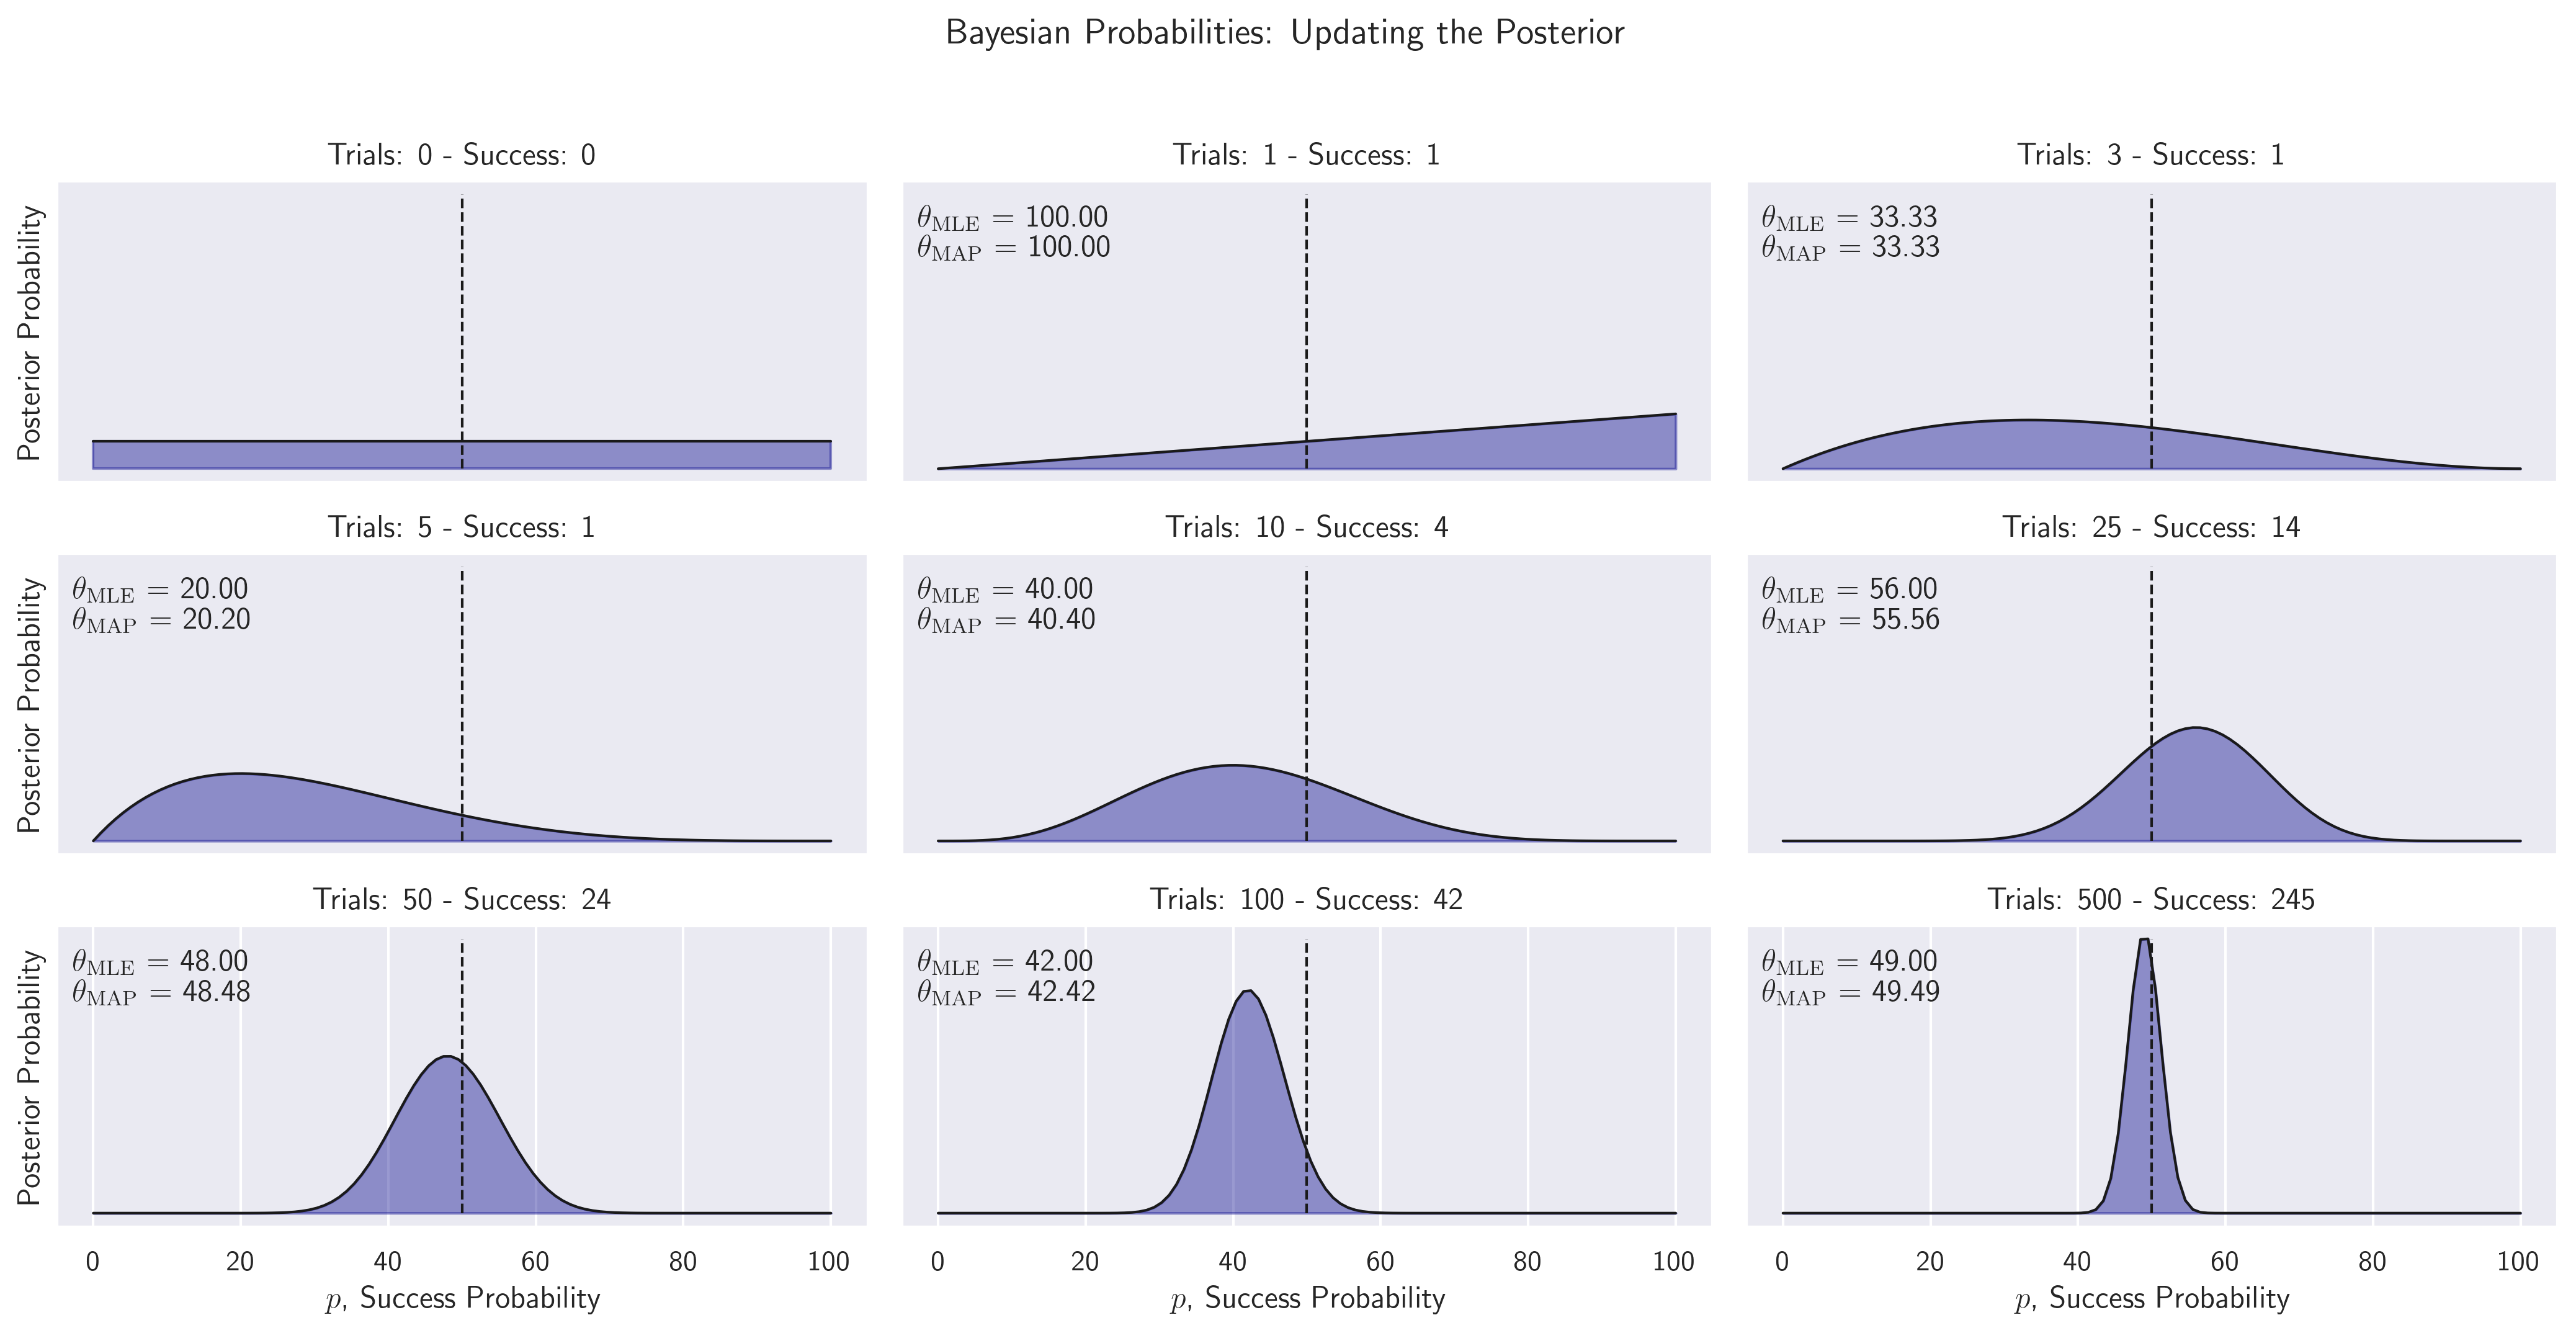

In [35]:
n_trials = [0, 1, 3, 5, 10, 25, 50, 100, 500]
outcomes = stats.bernoulli.rvs(p=0.5, size=n_trials[-1])
p = np.linspace(0, 1, 100)
# uniform (uninformative) prior
a = b = 1

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 7), sharex=True)
axes = axes.flatten()
fmt = FuncFormatter(lambda x, _: f'{x:.0%}')
for i, trials in enumerate(n_trials):
    successes = outcomes[:trials]
    theta_mle = np.mean(successes)
    heads = sum(successes)
    tails = trials - heads
    update = stats.beta.pdf(p, a + heads , b + tails)
    theta_map = pd.Series(update, index=p).idxmax()
    axes[i] = format_plot(axes, i, p, update, trials=trials, success=heads, 
                          true_p=.5, tmle=theta_mle, tmap=theta_map)

title = 'Bayesian Probabilities: Updating the Posterior'
fig.suptitle(title,  y=1.02, fontsize=14)
fig.tight_layout()
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [10]:
credit = pd.read_csv('german_credit_data.csv')

In [11]:
credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [12]:
del credit['Unnamed: 0']
credit.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.rcParams["figure.figsize"] = (10,6)

In [15]:
numerical_credit = credit.select_dtypes(exclude='O')

In [16]:
plt.figure(figsize=(10, 8))
k = 0
cols = numerical_credit.columns
for i, j in zip(range(len(cols)), cols):
    k +=1
    plt.subplot(2, 2, k)
    plt.hist(numerical_credit.iloc[:, i])
    plt.title(j)

In [17]:
from sklearn.preprocessing import StandardScaler
import numpy as np

In [18]:
scaler = StandardScaler()
scaled_credit = scaler.fit_transform(numerical_credit)

In [19]:
df_scaled = pd.DataFrame(scaled_credit)
df_scaled['Risk'] = credit['Risk']
df_scaled.columns = ['Age', 'Job', 'Credit amount',
                     'Duration', 'Risk']

In [20]:
df_scaled['Risk'].value_counts()

good    700
bad     300
Name: Risk, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
df_scaled['Risk'] = df_scaled['Risk'].replace({'good': 1, 'bad': 0})

In [23]:
X = df_scaled.drop('Risk', axis=1)
y = df_scaled.loc[:, ['Risk']]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [25]:
X_train = X_train
y_train = y_train['Risk']

In [26]:
X_test = X_test
y_test = y_test['Risk']

In [27]:
from imblearn.combine import SMOTEENN
smote = SMOTEENN(random_state = 2)

In [28]:
X_train, y_train = smote.fit_resample(X_train, y_train.ravel())

## Logistic Regression for PD estimation

In [29]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

In [30]:
logit = sm.Logit(y_train, X_train)
logit_fit = logit.fit()
print(logit_fit.summary())

Optimization terminated successfully.
         Current function value: 0.513461
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  456
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                            3
Date:                Tue, 04 Oct 2022   Pseudo R-squ.:                  0.2505
Time:                        17:51:42   Log-Likelihood:                -234.14
converged:                       True   LL-Null:                       -312.38
Covariance Type:            nonrobust   LLR p-value:                 1.055e-33
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Age               0.7812      0.124      6.285      0.000       0.538       1.025
Job               0.

In [31]:
pred_prob = logit_fit.predict(X_test)

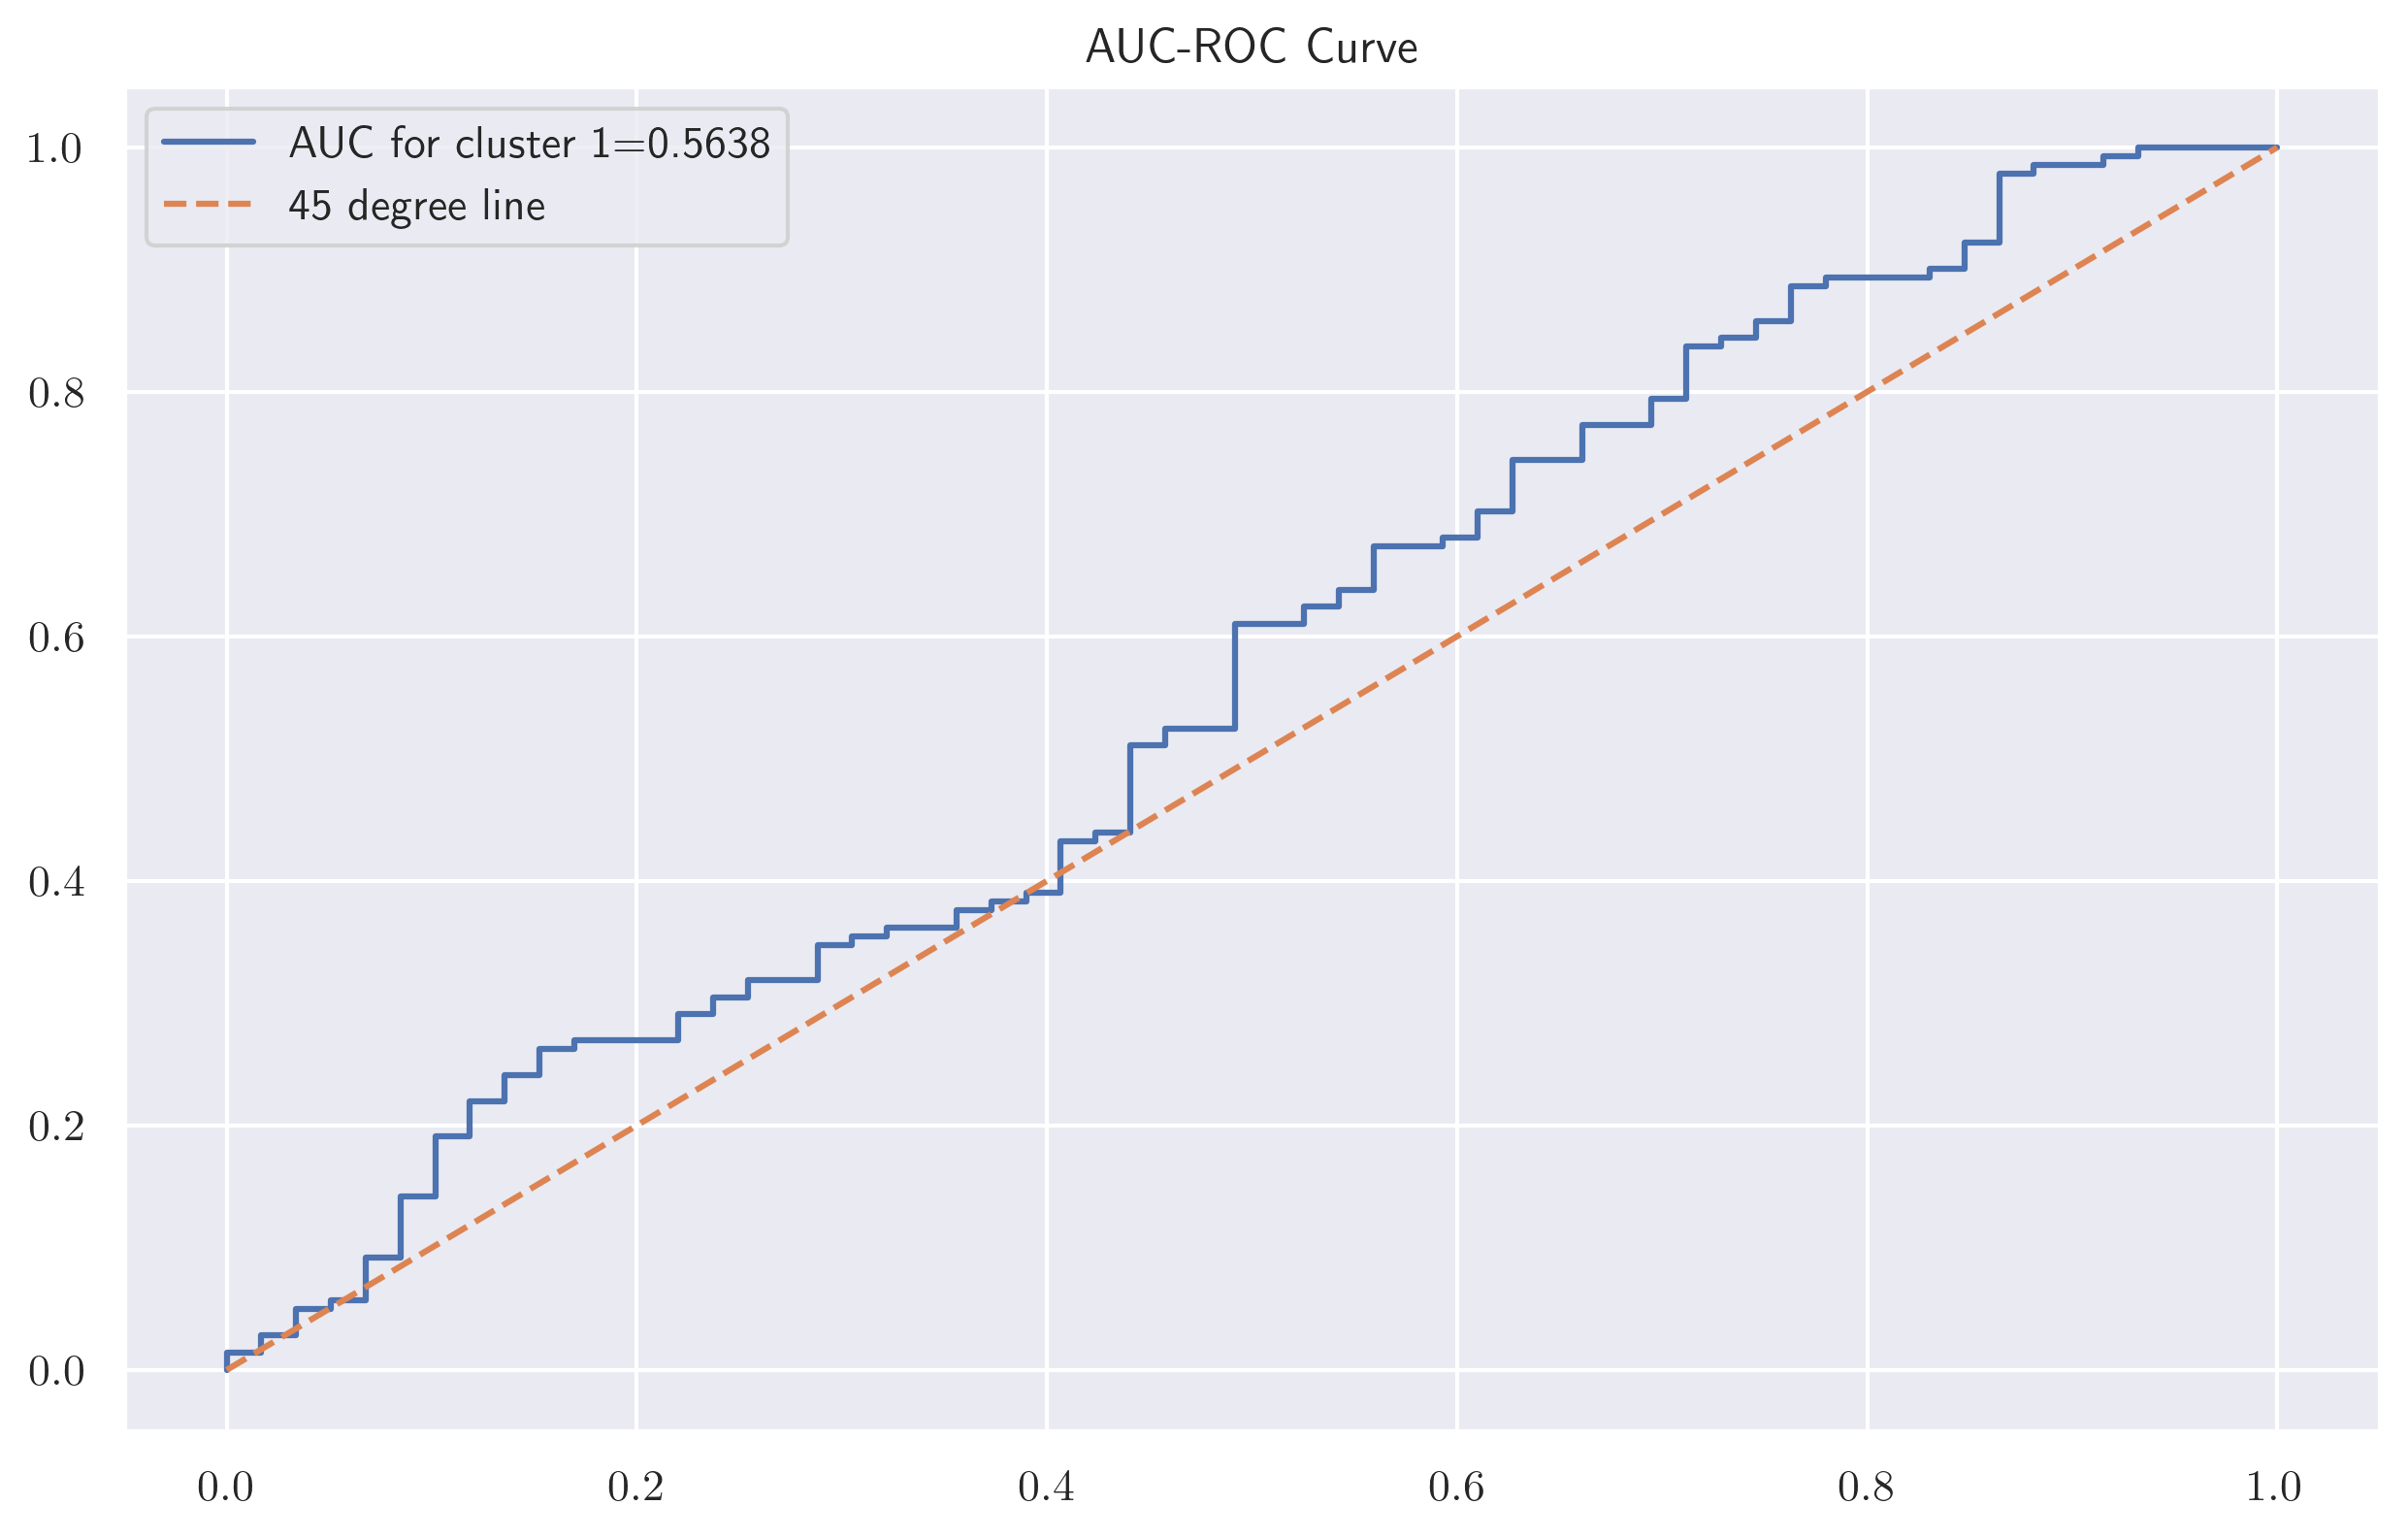

In [36]:
false_pos, true_pos, _ = roc_curve(y_test.values,  pred_prob)
auc = roc_auc_score(y_test, pred_prob)
plt.plot(false_pos,true_pos, label="AUC for cluster 1={:.4f} "
         .format(auc))
plt.plot([0, 1], [0, 1], linestyle = '--', label='45 degree line')
plt.legend(loc='best')
plt.title('AUC-ROC Curve')
plt.show()

## Bayesian Approach

In [34]:
!pip install pymc3

  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529976 sha256=72e13b51d90c46ea925b7aaf1b7e0b402cd2f856cdc1b34a6143369174e3b4dc
  Stored in directory: c:\users\envy_\appdata\local\pip\cache\wheels\04\22\4d\832878ba2fe9ea3543f0189b9288a78e4aa4e0afc851a6890c
Successfully built theano-pymc


In [37]:
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [38]:
X_train.head()

,Age,Job,Credit amount,Duration
0,2.414647,0.146949,1.263499,3.243815
1,-0.223927,0.146949,-0.337522,0.008048
2,-0.223927,0.146949,-0.323344,0.256953
3,-1.191404,0.146949,-0.675306,-0.987573
4,-1.279356,-1.383771,-0.455197,0.256953


In [39]:
with pm.Model() as logistic_model:
    beta_age = pm.Normal('coeff_age', mu=0, sd=10)
    beta_job = pm.Normal('coeff_job', mu=0, sd=10)
    beta_credit = pm.Normal('coeff_credit_amount', mu=0, sd=10)
    beta_dur = pm.Normal('coeff_duration', mu=0, sd=10)
    p = pm.Deterministic('p', pm.math.sigmoid(beta_age * 
                              X_train['Age'] + beta_job *
                              X_train['Job'] + beta_credit *
                              X_train['Credit amount'] + beta_dur *
                              X_train['Duration']))
with logistic_model:
    observed = pm.Bernoulli("risk", p, observed=y_train)
    map_estimate = pm.find_MAP()

In [40]:
param_list = ['coeff_age', 'coeff_job',
              'coeff_credit_amount', 'coeff_duration']
params = {}
for i in param_list:
    params[i] = [np.round(map_estimate[i], 6)] 
    
bayesian_params = pd.DataFrame.from_dict(params)    
print('The result of Bayesian estimation:\n {}'.format(bayesian_params))

The result of Bayesian estimation:
    coeff_age  coeff_job  coeff_credit_amount  coeff_duration
0   0.781083   0.197849            -0.456893       -0.843769


## MCMC

- 10,000 posterior samples to simulate the posterior distribution for two independent Markov chain

In [41]:
import logging
logger = logging.getLogger('pymc3')
logger.setLevel(logging.ERROR)

In [ ]:
with logistic_model:
    step = pm.Metropolis()
    trace = pm.sample(10000, step=step,progressbar = False)
az.plot_trace(trace)
plt.show()

In [82]:
with logistic_model:
    display(az.summary(trace, round_to=6)[:4])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
coeff_age,0.790959,0.125542,0.553490,1.025593,0.002641,0.001867,2256.127312,2421.375311,1.000783
coeff_job,0.204322,0.118626,-0.020980,0.423878,0.002793,0.001982,1797.617914,2092.901575,1.001053
coeff_credit_amount,-0.469082,0.142028,-0.732240,-0.200573,0.004539,0.003315,988.700784,1410.480558,1.002705
coeff_duration,-0.856468,0.152954,-1.144721,-0.570424,0.003925,0.002776,1515.716123,1983.892866,1.002677
